In [51]:
import pandas as pd
from hmmlearn.hmm import GaussianHMM
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler,MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import pickle
import matplotlib.cm as cm
import pylab as pl
# fig_dir = "./Figures/"
plt.rcParams["figure.facecolor"] = "w"

In [4]:
data_dir = "../Data/"
fig_dir = "../Figures/"

In [75]:
animal_id = 8
mouse_indiv_wo_outliers = pd.read_csv(data_dir+"mouse_data_with_states_"+str(animal_id)+".csv")

In [76]:
mouse_indiv_wo_outliers.session.unique()

array([48, 49, 50, 51, 52])

In [77]:
sess0 = mouse_indiv_wo_outliers.loc[mouse_indiv_wo_outliers["session"]==48]
sess0.to_csv(data_dir+"session_0_full_mouse9.csv")

In [78]:
features = ["dec_time_mv", "optimal_action_mv", "reward_mv"]

In [79]:
to_plot = sess0[["dec_time_mv", "optimal_action_mv", "reward_mv","block_change","trial_num"]].reset_index().melt(id_vars=["block_change","trial_num","index"])

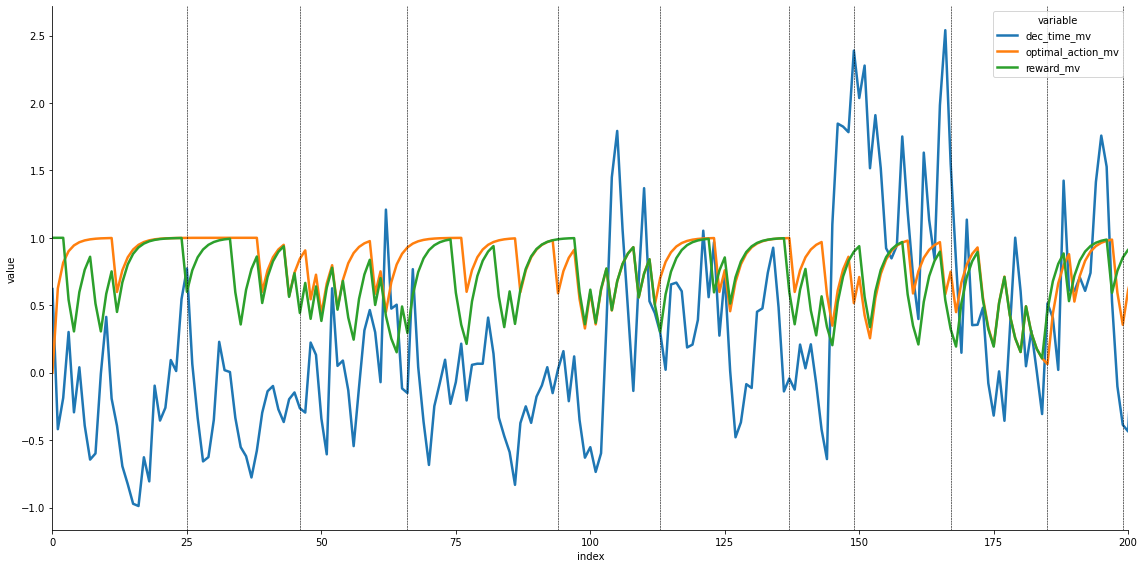

In [81]:
fig,ax = pl.subplots(1,1,figsize=(16,8))
sns.lineplot(x="index",y="value",hue="variable",data=to_plot,ax=ax,lw=2.5)
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
bc = to_plot.loc[to_plot["block_change"]==1]['index'].values
ylims = ax.get_ylim()
for x in bc:
    ax.vlines(x=x,ymin=ylims[0],ymax=ylims[1],ls='dashed',color='k',lw=0.5,alpha=0.5)
    ax.set_ylim(ylims[0],ylims[1])

ax.set_xlim(0,200)
pl.tight_layout()
fig.savefig(fig_dir+"example_trace_"+str(animal_id)+".png")

In [82]:
to_plot.loc[to_plot["block_change"]==1]

,block_change,trial_num,index,variable,value
25,1,0,25,dec_time_mv,0.772128
46,1,0,46,dec_time_mv,-0.263727
66,1,0,66,dec_time_mv,-0.151016
94,1,0,94,dec_time_mv,0.025906
113,1,0,113,dec_time_mv,0.296230
137,1,0,137,dec_time_mv,-0.042790
149,1,0,149,dec_time_mv,2.387861
167,1,0,167,dec_time_mv,1.548535
185,1,1,185,dec_time_mv,0.513947
199,1,2,199,dec_time_mv,-0.386820


In [83]:
state_nums = sess0["state"].reset_index()

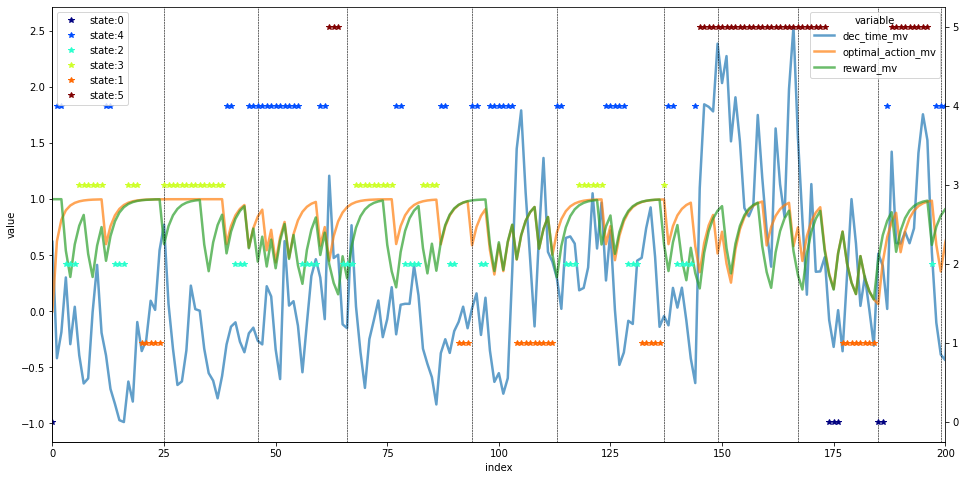

In [85]:
fig,ax = pl.subplots(1,1,figsize=(16,8))
sns.lineplot(x="index",y="value",hue="variable",data=to_plot,ax=ax,lw=2.5,alpha=0.7)
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
bc = to_plot.loc[to_plot["block_change"]==1]['index'].values
ylims = ax.get_ylim()
for x in bc:
    ax.vlines(x=x,ymin=ylims[0],ymax=ylims[1],ls='dashed',color='k',lw=0.5,alpha=0.5)
    ax.set_ylim(ylims[0],ylims[1])


ax.set_xlim(0,200)

ax2 = ax.twinx()
sn = state_nums.state.unique()
cmap = cm.get_cmap('jet',len(sn))
colors = [cmap(i) for i in np.arange(len(sn))]
for i,s in enumerate(sn):
    ind = state_nums.loc[state_nums['state']==s]['index'].values
    ax2.plot(ind,[s]*len(ind),color=colors[i],marker='*',lw=0,label="state:"+str(s))
ax2.legend(loc='upper left')

# sns.lineplot(x="index",y="state",hue="state",data=state_nums,ax=ax2,lw=2.5)
fig.savefig(fig_dir+"example_trial_with_states_"+str(animal_id)+".png")

In [86]:
model = pickle.load(open(data_dir+"HMM_model_9.pickle","rb"))

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accumulate_sufficient_statistics',
 '_accumulate_sufficient_statistics_log',
 '_accumulate_sufficient_statistics_scaling',
 '_check',
 '_check_and_set_n_features',
 '_check_feature_names',
 '_check_n_features',
 '_check_sum_1',
 '_compute_likelihood',
 '_compute_log_likelihood',
 '_compute_lower_bound',
 '_compute_posteriors_log',
 '_compute_posteriors_scaling',
 '_covars_',
 '_decode_map',
 '_decode_viterbi',
 '_do_estep',
 '_do_mstep',
 '_estep_begin',
 '_fit_log',
 '_fit_scaling',
 '_generate_sample_from_state',
 '_get_n_fit_scalars_per_param',
 '_get_param_names',
 '_get_tags',
 '_i

In [91]:
model.get_params()

{'algorithm': 'viterbi',
 'covariance_type': 'full',
 'covars_prior': 0.01,
 'covars_weight': 1,
 'implementation': 'log',
 'init_params': 'stmc',
 'means_prior': 0,
 'means_weight': 0,
 'min_covar': 0.001,
 'n_components': 7,
 'n_iter': 300,
 'params': 'stmc',
 'random_state': None,
 'startprob_prior': 1.0,
 'tol': 0.001,
 'transmat_prior': 1.0,
 'verbose': False}